# Introduction:

This project focuses on applying various data preparation and feature engineering techniques to a dataset containing information related to automobile gas mileage. The goal is to prepare the data for potential use in machine learning algorithms, address common data quality issues, and extract meaningful insights through exploratory data analysis.

***

* **Research Question:**
    * This study is guided by the research question:
"What are the key vehicle characteristics that influence automobile gas mileage, and how can we effectively prepare this data for machine learning modeling?"


* **Variables:**
    * The dataset comprises 205 observations and 26 attributes. 
    * Here are the independent variables and their descriptions, based on the UCI Machine Learning Repository's Automobile dataset:
        * **symboling:** -3, -2, -1, 0, 1, 2, 3.
        * **normalized-losses:** continuous from 65 to 256.
        * **make:** alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
        * **fuel-type**: diesel, gas.
        * **aspiration:** std, turbo.
        * **num-of-doors:** four, two.
        * **body-style:** hardtop, wagon, sedan, hatchback, convertible.
        * **drive-wheels**: 4wd, fwd, rwd.
        * **engine-location:** front, rear.
        * **wheel-base:** continuous from 86.6 120.9.
        * **length:** continuous from 141.1 to 208.1.
        * **width:** continuous from 60.3 to 72.3.
        * **height:** continuous from 47.8 to 59.8.
        * **curb-weight:** continuous from 1488 to 4066.
        * **engine-type:** dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
        * **num-of-cylinders:** eight, five, four, six, three, twelve, two.
        * **engine-size:** continuous from 61 to 326.
        * **fuel-system:** 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
        * **bore:** continuous from 2.54 to 3.94.
        * **stroke:** continuous from 2.07 to 4.17.
        * **compression-ratio:** continuous from 7 to 23.
        * **horsepower:** continuous from 48 to 288.
        * **peak-rpm:** continuous from 4150 to 6600.
         <br>
         <br>
    * Dependent Variables (for gas mileage context):
        * **city-mpg:** continuous from 13 to 49.
        * **highway-mpg:** continuous from 16 to 54.
        * **price:** continuous from 5118 to 45400.

***

**Procedures:**

Here are main procedures of the analysis:
<br>

* **Part 1**: Load and summarize data
    * For Part 1, Load data:
        * Get data from GitHub
        * Load the dataset into a Pandas DataFrame.
        * Assign meaningful column headings.
         <br>
         <br>
* **Part 2**: Perform Exploratory Data Analysis
    * For Part 2, the main components of EDA include:
        * Understanding the nature of each variable.
        * Initial inspection for missing values and data types.
        * Analyzing distributions and relationships between variables.
        * Creating appropriate exploratory graphics (bar plots, box plots, histograms, line plots, etc.).
        * Deriving insights from statistical analysis and graphics.
         <br>
         <br>
- **Part 3**: Data Preparation & Feature Engineering
    * For Part 3, address specific challenges identified in the dataset:
        * Question 1: Identify numeric variables requiring feature scaling, list each relevant variable and explain why.
        * Question 2: Consider the `engine-size` and `stroke` variables:
            * Address missing values in `num-of-doors` and `price` using an effective imputation approach
            * Avoiding simple mean/median/mode, describe the imputation methodand
            * Explain results with graphics.
        * Question 3: Consider the `engine-size` and `stroke` variables:
            * Apply specific feature scaling methods to engine-size and stroke
            * Generate histograms and boxplots on original then scaled distributions
            * Compare both, comment on the improvements and if didn't improve explain why 
        * Question 4: Consider the `symboling`, `make`, and `engine-type` variables:
            * Characterize each variable such as(numeric/continuous, numeric/discrete, categorical/nominal, or categorical/ordinal)
            * For each variable, describe and apply appropriate data preparation methodologies, showing sample results.
        * Question 5: Reduce the dimensionality of selected variables (`wheel-base`, `length`, `width`, `height`, `curb-weight`, `engine-size`, `compression-ratio`, `horsepower`, `peak-rpm`, `city-mpg`) to a set of new orthogonal features using a suitable dimensionality reduction method, explaining the approach and results (number of features, explained variability, expalin new features).
         <br>
         <br>
* **Part 4**: Conclusion
    * Summarize the findings and key insights from the data preparation, feature engineering, and exploratory data analysis.
    * Discuss the overall readiness of the data for machine learning algorithms

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

## Part 1: Data Analysis

In this case, Data Analysis consist of:
1. Get data from GitHub
2. Load the dataset into a Pandas DataFrame.
3. Assign meaningful column headings.

### 1. Get dataset

In [242]:
# URL to diamonds.csv file on GitHub
am_data = "https://raw.githubusercontent.com/CheliMex/CS381_DataAnalytics/refs/heads/main/Quiz2/automobile/imports-85.data"

### 2. Load dataset

In [243]:
# Loading the dataset into a Pandas DataFrame
df = pd.read_csv(am_data, header=None, names=column_names)

### 3. Assigning Columns Names

In [244]:
# Define the column names based on the Automobile dataset
column_names = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration",
    "num-of-doors", "body-style", "drive-wheels", "engine-location",
    "wheel-base", "length", "width", "height", "curb-weight", "engine-type",
    "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke",
    "compression-ratio", "horsepower", "peak-rpm", "city-mpg",
    "highway-mpg", "price"
]

# Display every row and column
print("--- Initial Data Load ---\n")
df

--- Initial Data Load ---



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Part 2: Perform Exploratory Data Analysis (EDA)

In this case, EDA consist of:
1. Initial Data Inspection
2. Statistical Analysis
3. Exploratory Graphics (e.g., bar plots, box plots, histograms, line plots, etc.)
4. Deriving Insights

### 1. Initial Data Inspection

* Checking data types of all columns.
* Identifying missing values.
* Examining unique values for categorical features.

In [245]:
print("--- Initial DataFrame Info (before cleaning '?' values) ---\n")
df.info()

--- Initial DataFrame Info (before cleaning '?' values) ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylind

In [246]:
# --- Initial Data Inspection and Cleaning ---
# Replacing '?' with NaN in DataFrame
df.replace("?", np.nan, inplace=True)

In [247]:
print("--- DataFrame after replacing '?' with NaN ---\n")
df

--- DataFrame after replacing '?' with NaN ---



,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [248]:
print("--- Missing Values Count after replacing '?' ---\n")
df.isnull().sum()

--- Missing Values Count after replacing '?' ---



symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [249]:
# Identify columns that should be numeric but might be 'object' due to '?'

numeric_cols = [
    "normalized-losses", "bore", "stroke", "horsepower", "peak-rpm", "price",
    "wheel-base", "length", "width", "height", "curb-weight", "engine-size",
    "compression-ratio", "city-mpg", "highway-mpg"
]

# convert to numeric, coercing errors to NaN
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("--- DataFrame Info after converting relevant columns to numeric --- \n")
df.info()

--- DataFrame Info after converting relevant columns to numeric --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-

### 2. Statistical Analysis

* Calculate descriptive statistics for numeric variables
* Analyze value count and proportions for categorical variables.
* Investigating correlations between numeric variables.

In [250]:
print("--- Descriptive Statistics for Numeric Columns --- \n")
df.describe()

--- Descriptive Statistics for Numeric Columns --- 



,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [251]:
print("--- Value Counts for Categorical Columns --- \n")

# Select object columns (probably categorical) for value counts
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for '{col}':")
    print(df[col].value_counts())

--- Value Counts for Categorical Columns --- 


Value counts for 'make':
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
jaguar            3
renault           2
mercury           1
Name: count, dtype: int64

Value counts for 'fuel-type':
fuel-type
gas       185
diesel     20
Name: count, dtype: int64

Value counts for 'aspiration':
aspiration
std      168
turbo     37
Name: count, dtype: int64

Value counts for 'num-of-doors':
num-of-doors
four    114
two      89
Name: count, dtype: int64

Value counts for 'body-style':
body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

Value cou

### 3. Exploratory Graphics

* Creating histograms to visualize the distribution of numeric variables.
* Generating box plots to identify outliers and understand the spread of numeric variables.
* Producing bar plots to show the frequency or distribution of categorical variables.
* Utilizing scatter plots to explore relationships between pairs of numeric variables.
* Employing other relevant plots (e.g., count plots, violin plots).

In [252]:
# --- Exploratory Graphics ---
# Set up matplotlib for better visualization
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.titlesize'] = 16

Generating Histograms...


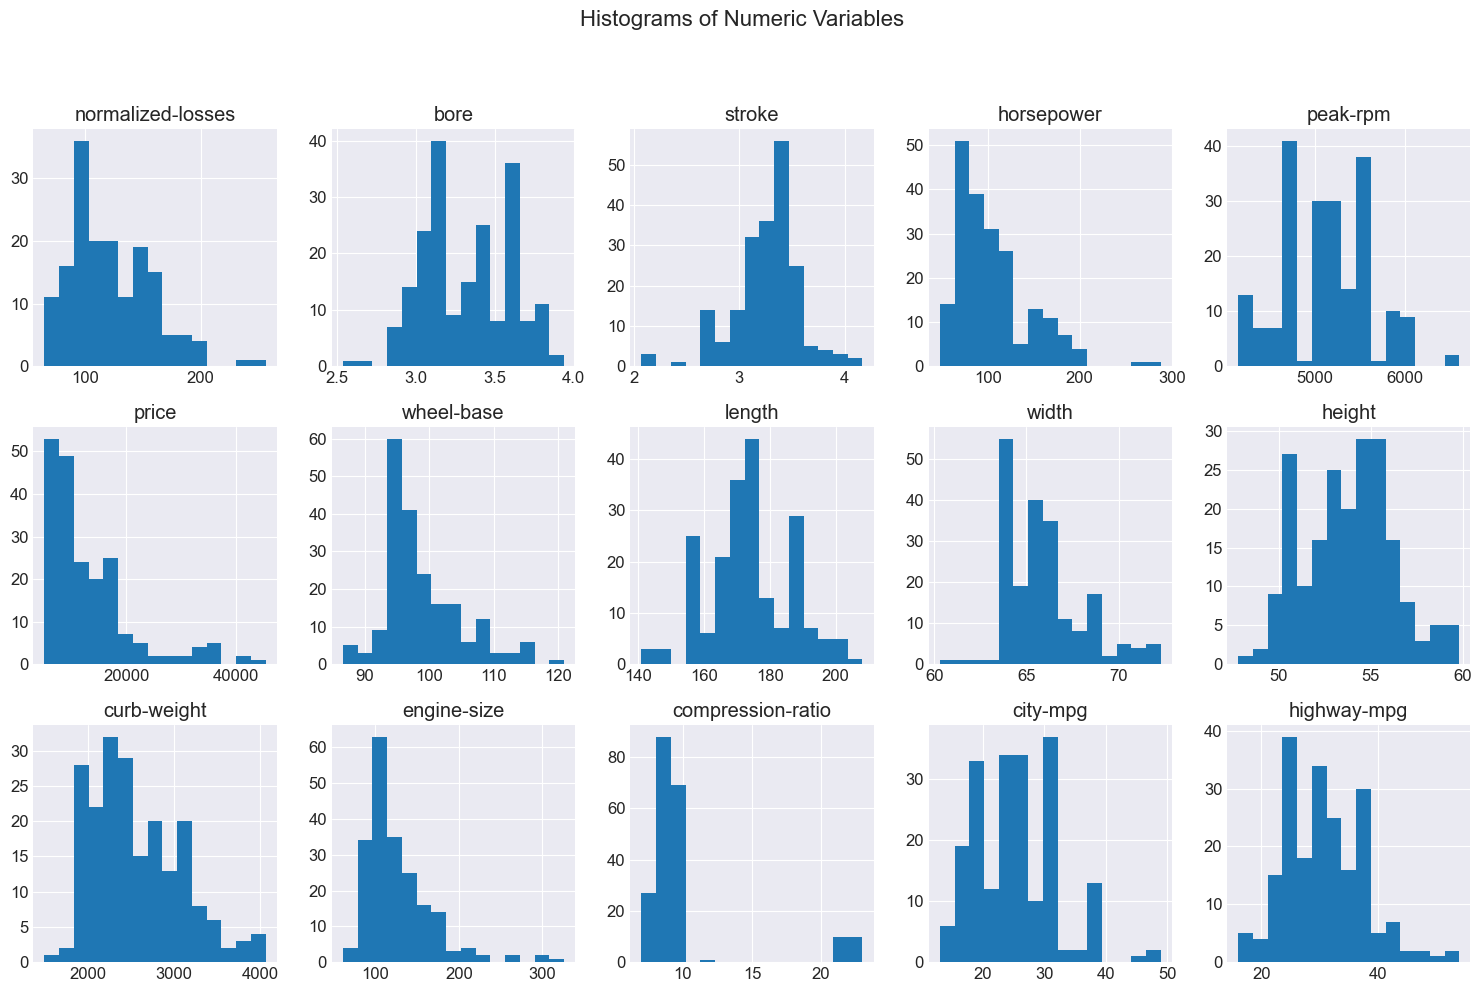

In [253]:
# Histograms for Numeric Variables
print("Generating Histograms...")

df[numeric_cols].hist(bins=15, figsize=(15, 10), layout=(3, 5))
plt.suptitle('Histograms of Numeric Variables', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.show()

* **Are they skewed (leaning to one side)?**
    * `normalized-losses:` This distribution appears right-skewed. Most values are concentrated on the lower end, with a tail extending towards higher values.
    * `bore:` The distribution looks relatively symmetric. It doesn't show extreme skewness.
    * `stroke:` This distribution also appears relatively symmetric.
    * `horsepower:` Clearly right-skewed. A large concentration of values is on the lower end.
    * `peak-rpm:` This distribution appears fairly symmetric.
    * `price:` This is highly right-skewed. The vast majority of cars are at the lower price range.
    * `wheel-base:` This distribution appears mostly symmetric, with a slight tendency to be right-skewed.
    * `length:` Similar to wheel-base, this also appears mostly symmetric.
    * `width:` This distribution is generally symmetric.
    * `height:` This distribution seems relatively symmetric.
    * `curb-weight:` This distribution is clearly right-skewed, with vehicles at lower weights.
    * `engine-size:` This is clearly right-skewed. Most cars have smaller engine sizes.
    * `compression-ratio:` This distribution is right-skewed, with a very strong peak at the lower end (around 8-10).
    * `city-mpg:` This distribution is noticeably right-skewed.
    * `highway-mpg:` Similar to city-mpg, this distribution is also right-skewed.
<br>
* **Are the distributions normal (bell-shaped)?**
    * No, many variables are notably right-skewed and some are more symmetric.

Generating Box Plots...


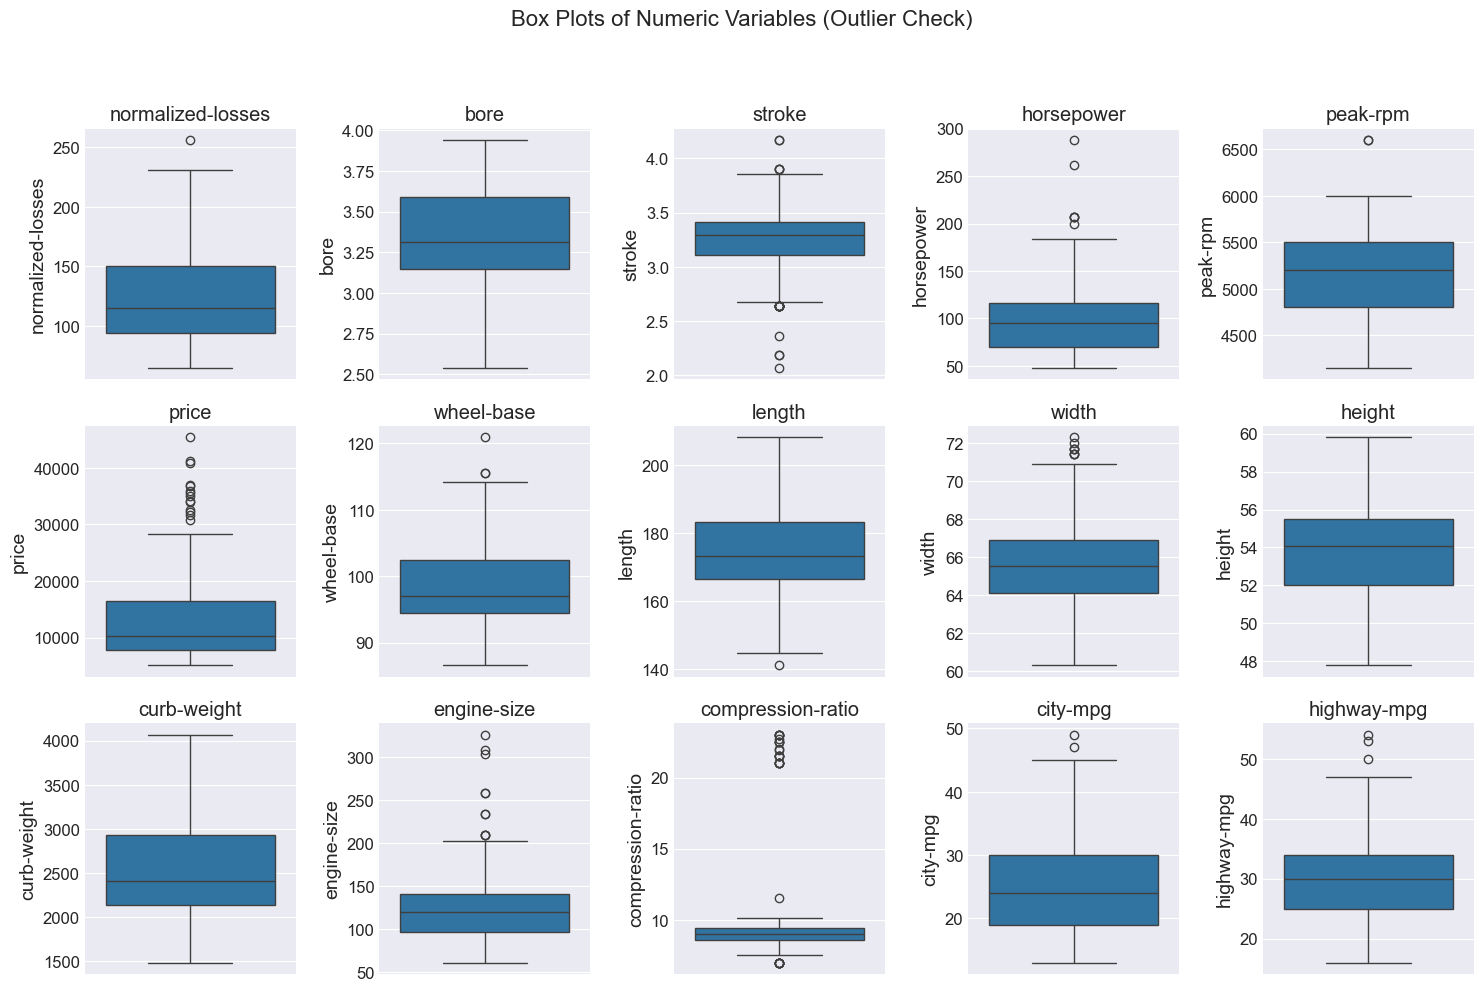

In [254]:
# Box Plots for Numeric Variables to check for outliers
print("Generating Box Plots...")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=df[col].dropna()) # dropna to handle NaNs for plotting
    plt.title(col)
plt.suptitle('Box Plots of Numeric Variables (Outlier Check)', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

* Looking at `price`, the median is looks very low, showing that most cars in the dataset are on the cheaper side, consistent with the right-skewness observed in the histograms.
* Looking at `stroke`, has a shorter box, indicating less variability in its central distributions.
* You can see the overall range of values for each variable by looking at the extent of the whiskers. Looking at `compression-ratio` it has a very small range, while `curb-weight` has a much bigger range.
 
 **Note:**
* If the median is roughly in the middle of the box, it's fairly symmetric.
* If the median is closer to the bottom, it's likely right-skewed.
* If the median is closer to the top, it's likely left-skewed.

Generating Count Plots for Categorical Variables...
Skipping count plot for 'make' due to too many unique values (22).


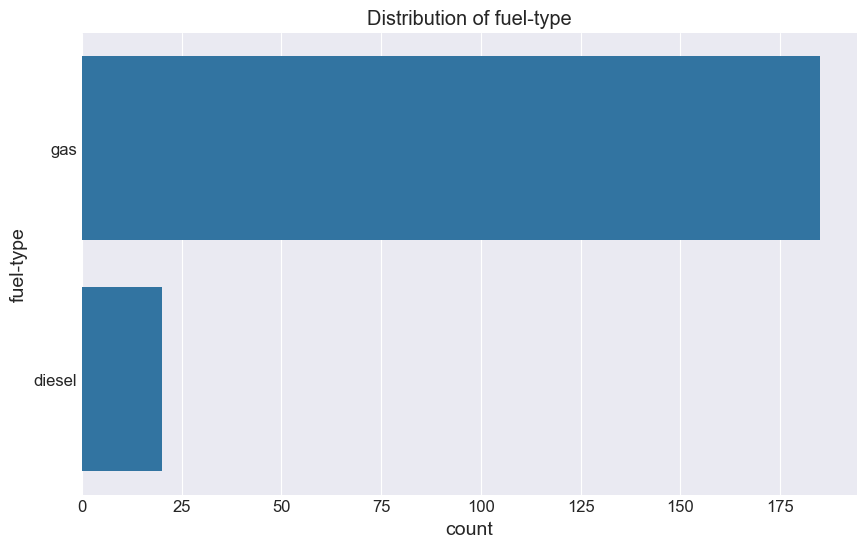

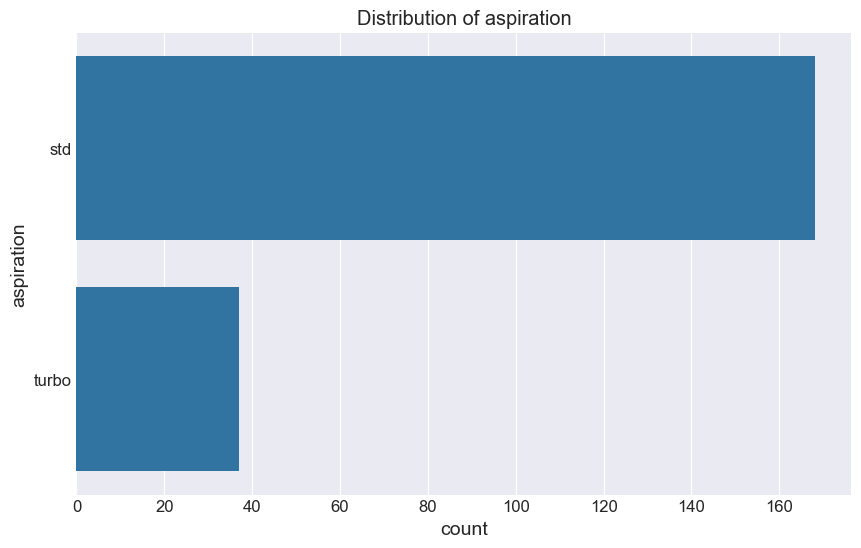

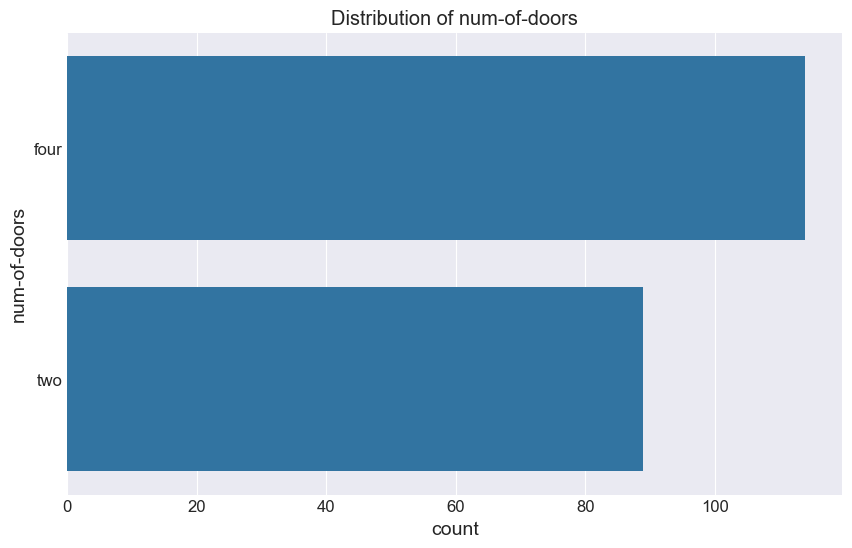

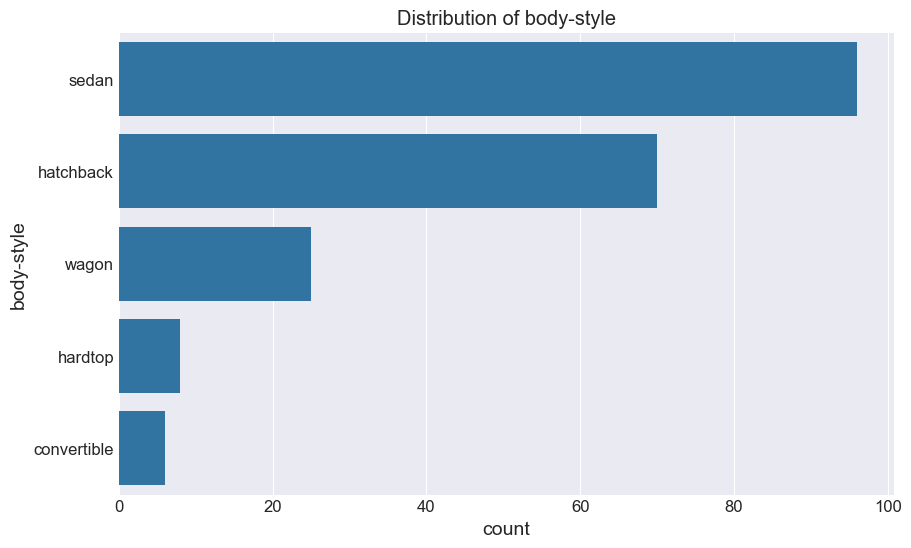

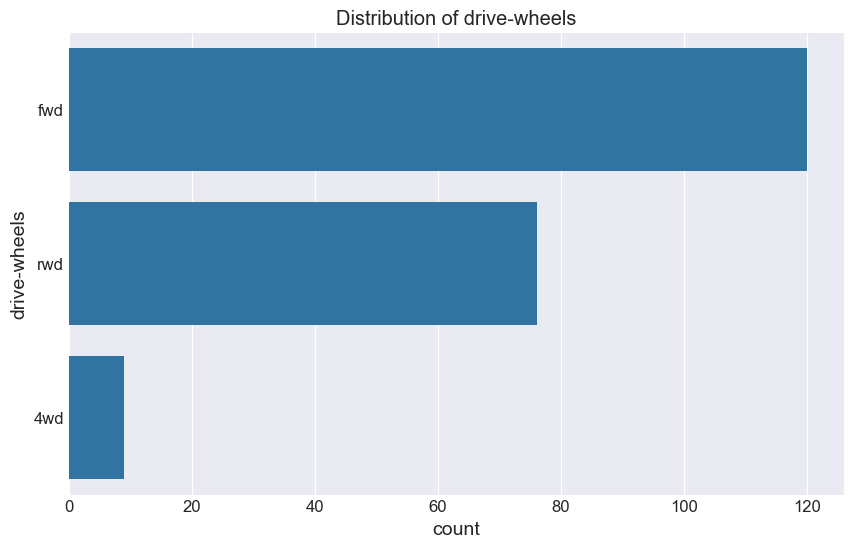

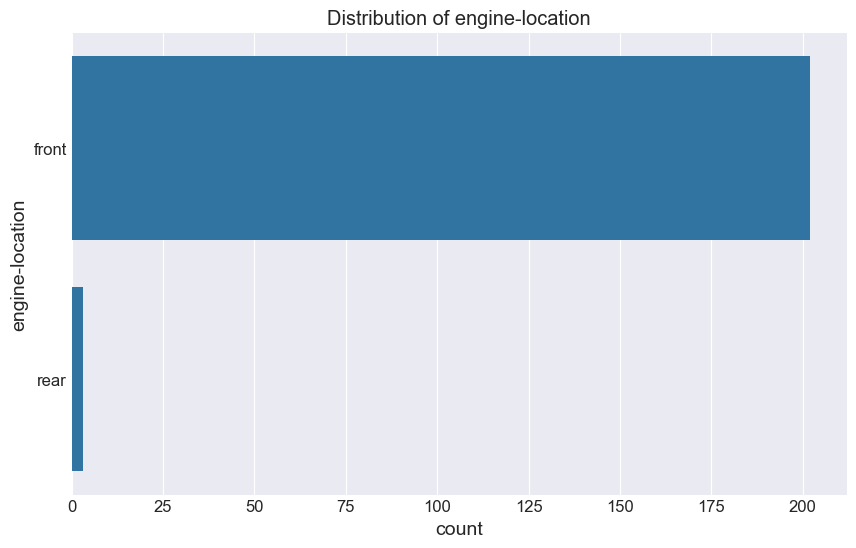

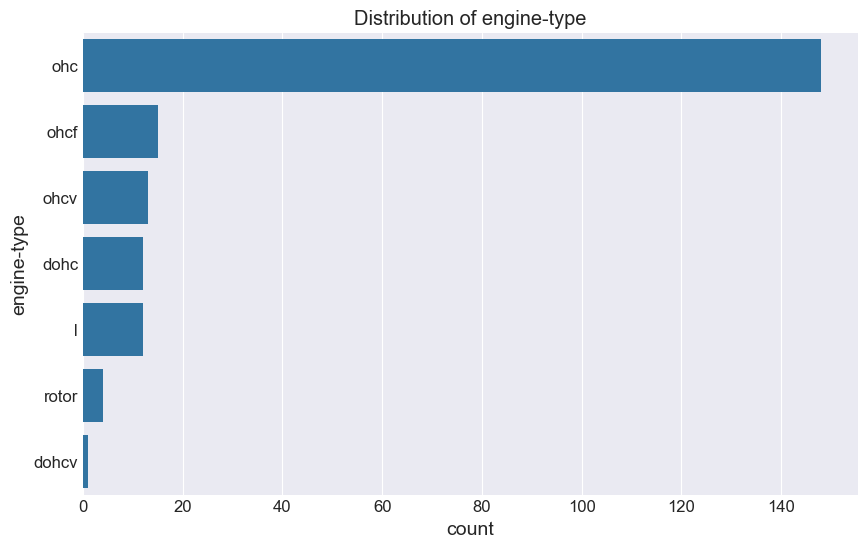

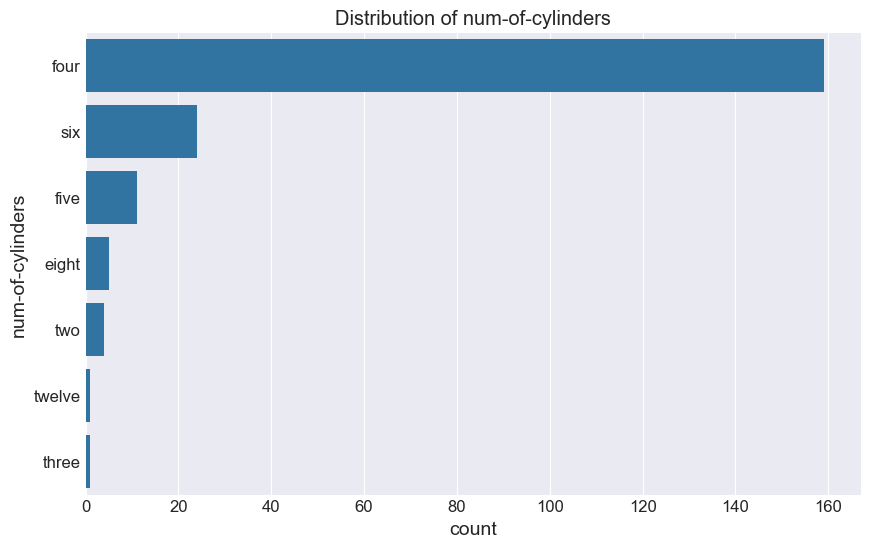

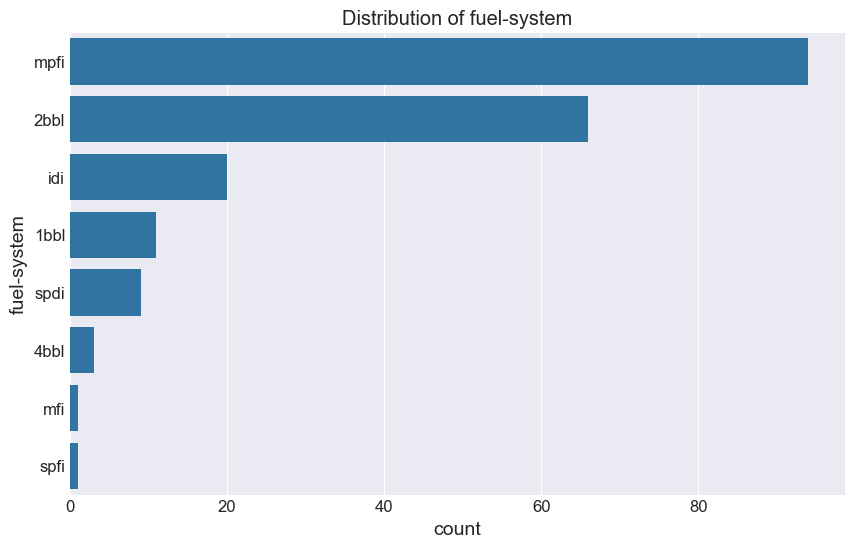

In [255]:
# Count Plots for Categorical Variables
print("Generating Count Plots for Categorical Variables...")

for col in categorical_cols:
    if df[col].nunique() < 20: # Plot if not too many unique categories
        plt.figure(figsize=(10, 6))
        sns.countplot(y=df[col], order = df[col].value_counts().index)
        plt.title(f'Distribution of {col}')
        plt.show()
    else:
        # Exclude 'make' if it has too many unique values for a readable plot
        print(f"Skipping count plot for '{col}' due to too many unique values ({df[col].nunique()}).")


**Do some categories dominate others? Are there categories with very few observations?**
   * `Fuel-Type`
        * Dominance: "gas" cars dominate "diesel" cars.
        * Few Observations: "diesel" has fewer observations compared to "gas".
   * `Aspiration`
        * Dominance: "std" aspiration is much more common than "turbo" aspiration.
        * Few Observations: "turbo" has a very small count.
   * `Num-of-Doors`
        * Dominance: "four" door vehicles are more common than "two" door vehicles.
        * Few Observations: "two" door vehicles have fewer observations.
   * `Body-Style`
        * Dominance: "sedan" is the most dominant body style, followed by "hatchback".
        * Few Observations: "wagon", "hardtop", and especially "convertible" have relatively very few observations.
   * `Drive-Wheels`
        * Dominance: "fwd" cars are the most dominant, followed by "rwd".
        * Few Observations: "4wd" (four-wheel drive) has very few observations.
   * `Engine-Location`
        * Dominance: "front" engine location is extremely dominant.
        * Few Observations: "rear" engine location has very few observations.
   * `Engine-Type`
        * Dominance: "ohc" is the most dominant engine type.
        * Few Observations: Several engine types like "dohc", "dohcv", "rotor", "ohcf", and "l" have very few observations. "rotor" appears to have the least.
   * `Num-of-Cylinders`
        * Dominance: "four" cylinders are by far the most dominant.
        * Few Observations: Others "three", "eight", "five", and "twelve" having extremely low counts.
   * `Fuel-System`
        * Dominance: "mpfi" "2bbl" are the most dominant fuel systems.
        * Few Observations: Many fuel systems have very few observations, including "spdi", "idi", "1bbl", "spfi", "4bbl", and "mfi", "mfi" has the fewest.

Generating Scatter Plots for key relationships...



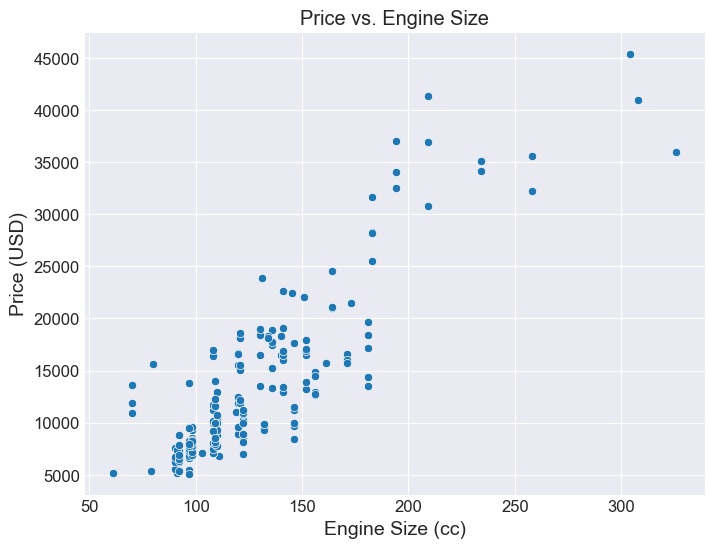

In [256]:
# Scatter Plots for key relationships (e.g., price vs. other numeric features)
print("Generating Scatter Plots for key relationships...\n")

# Price vs. Engine Size
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engine-size', y='price', data=df)
plt.title('Price vs. Engine Size')
plt.xlabel('Engine Size (cc)')
plt.ylabel('Price (USD)')
plt.show()

**Price vs. Engine Size**
* Positive, Non-linear Relationship:
    * There's a clear positive relationship between engine size and price. As engine-size increases, price increase as well.
* Curved/Non-linear Trend:
    * The relationship doesn't appear strictly linear. It seems to have a curvilinear, where the price increases more for larger engine sizes, especially for expensive ones.
    * This suggests that a simple linear model might not fully capture this relationship.
* Spread Increases with Engine Size:
    * The spread of prices also seems to increase as engine size gets larger.
* Outliers/High-End:
    * There are a few data points at very high engine-size and price values that stand out, these are probably luxurious or high-end vehicles.

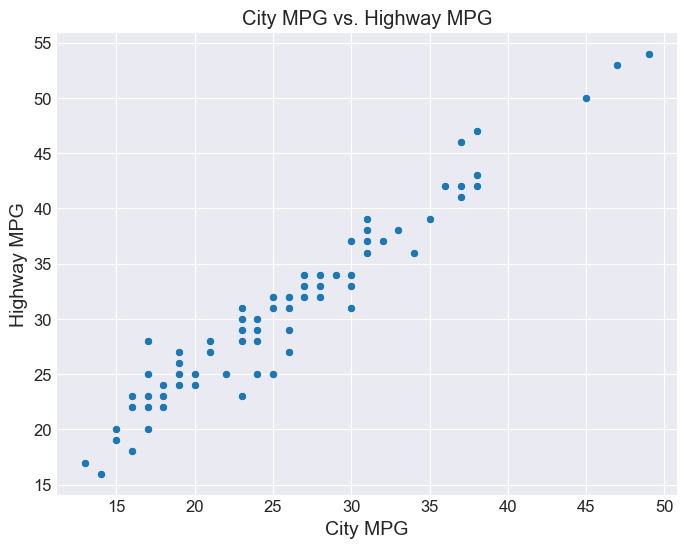

In [257]:
# City-mpg vs. Highway-mpg
plt.figure(figsize=(8, 6))
sns.scatterplot(x='city-mpg', y='highway-mpg', data=df)
plt.title('City MPG vs. Highway MPG')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.show()

**City MPG vs. Highway MPG**
* Strong Positive, Linear Relationship:
    * There is a very strong, almost perfectly linear, meaning there is a positive relationship between city-mpg and highway-mpg. Which seems to be expected since cars that are fuel-efficient in the city tend to be fuel-efficient on the highway.
* High Correlation:
    * This plot strongly suggests a high positive correlation between these two variables. If you know a car's city MPG, you can quite accurately predict its highway MPG.
* Implication for Modeling:
    * Due to this very high correlation, if we use both city-mpg and highway-mpg as independent variables in a linear model, it could cause issues.
    * So maybe its better to keep only one of them or maybe we can creating a composite "overall MPG" feature, or maybe use dimensionality reduction techniques.

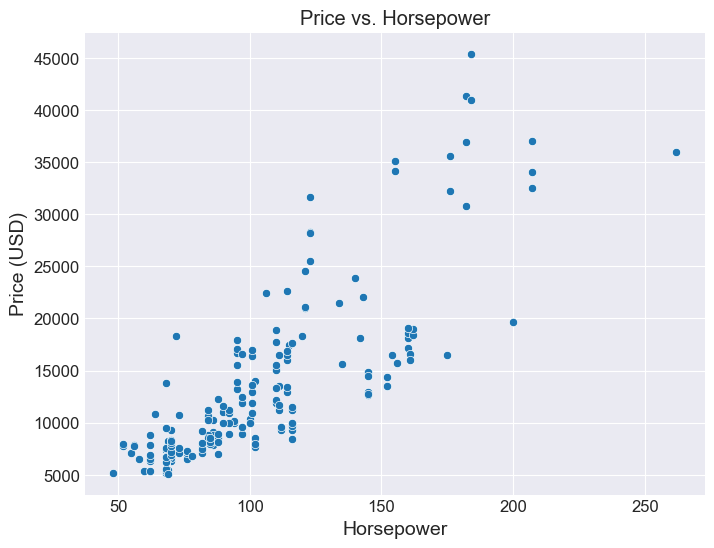

In [258]:
# Horsepower vs. Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title('Price vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Price (USD)')
plt.show()

**Price vs. Horsepower**
* Positive Relationship:
    * Similar to engine-size, there's a positive relationship between horsepower and price. Generally, higher horsepower cars tend to have higher prices.
* Clustering and Spread:
    * There's a noticeable clustering of data points at lower horsepower and price ranges, with a wider spread of prices as horsepower increases.
    * This could suggest a non-linear componen.
* Potential for Non-linearity:
    * While it shows a general upward trend, the relationship doesn't look perfectly linear. This is consistent with the right-skewness of horsepower and price.
* Outliers:
    * We can observe a few data points at very high horsepower and price values that act as outliers relative to the bulk of the data, similar to the Price vs. Engine Size plot.

**In summary**
* These scatter plots provide valuable visual evidence of the relationships between your numeric variables, highlighting linearity, direction either positive or negative, strength, and the presence of outliers.
* They are crucial for understanding how variables might influence each other, which is key for feature selection and engineering.

--- Calculating and Visualizing Correlation Matrix ---



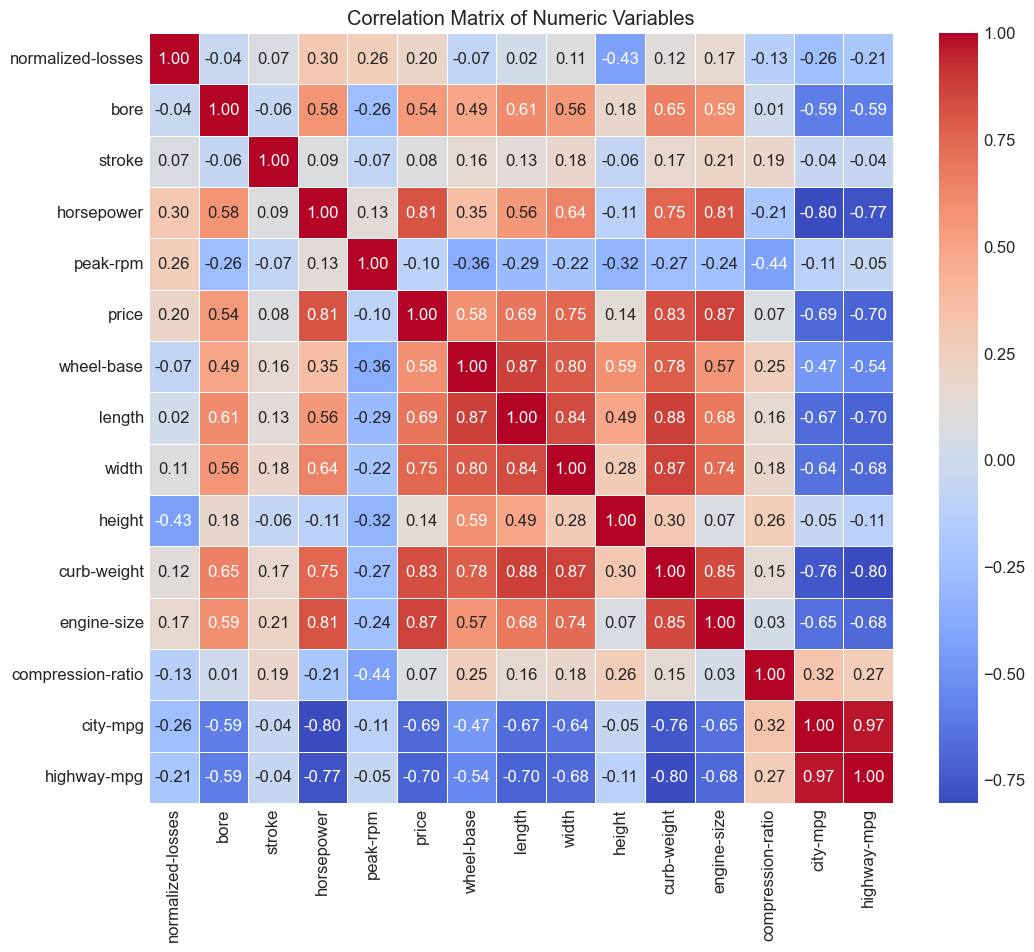


EDA complete. Review the outputs above for insights.


In [259]:
# --- Correlation Matrix for Numeric Variables ---
print("--- Calculating and Visualizing Correlation Matrix ---\n")
plt.figure(figsize=(12, 10))
# Calculate correlation, dropping rows with NaN for a clean correlation matrix
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

print("\nEDA complete. Review the outputs above for insights.")

* Strong positive correlation (close to 1): Variables increase together (e.g., length and wheel-base).
* Strong negative correlation (close to -1): As one variable increases, the other decreases (e.g., engine-size and city-mpg).
* Weak or No correlation (close to 0): Little to no linear relationship.
* The matrix is symmetric.
* This helps to identify highly correlated features.


### 4. Deriving Insights

* Summary of observations about data distributions, potential outliers, and missing data.
* Identifying initial relationships or trends between variables that might be relevant for modeling.
* Noting any variables that appear to have unusual values or require specific attention for later data preparation

**What We Observed:**
* Missing Data
* Uneven Distributions
* Outliers
* Categorical Imbalance

**Key Relationships We Found:**
* Price and Performance
* Fuel Efficiency Trade-offs
* Car Dimensions are Linked

**What Needs Attention for Data Preparation:**
* Filling Gaps beacuse we have missing values
* Reshaping Numbers beaucse it can benefit with transformations to make their distributions more balanced.
* Categorical Handling because the categorical variables with imbalanced
* Reducing Redundancy because many features are highly correlated 

## Part 3: Data Preparation & Feature Engineering

In this case, Data Summary consist of:
1. Loading data


### 1. Identify numeric variables requiring feature scaling and explain why.

In [260]:
# --- Illustrating the differing ranges of numeric variables ---
print("--- Ranges of Numeric Variables ---")
print("Variable                 Min        Max        Range (Max - Min)")
print("------------------------------------------------------------------")
for col in numeric_cols:
    col_min = df[col].min()
    col_max = df[col].max()
    col_range = col_max - col_min
    print(f"{col:<20} {col_min:10.2f} {col_max:10.2f} {col_range:15.2f}")

--- Ranges of Numeric Variables ---
Variable                 Min        Max        Range (Max - Min)
------------------------------------------------------------------
normalized-losses         65.00     256.00          191.00
bore                       2.54       3.94            1.40
stroke                     2.07       4.17            2.10
horsepower                48.00     288.00          240.00
peak-rpm                4150.00    6600.00         2450.00
price                   5118.00   45400.00        40282.00
wheel-base                86.60     120.90           34.30
length                   141.10     208.10           67.00
width                     60.30      72.30           12.00
height                    47.80      59.80           12.00
curb-weight             1488.00    4066.00         2578.00
engine-size               61.00     326.00          265.00
compression-ratio          7.00      23.00           16.00
city-mpg                  13.00      49.00           36.00
highwa

As observed, the numeric variables have vastly different scales, necessitating feature scaling.

**Variables Requiring Feature Scaling and Why:**
* Based on our Exploratory Data Analysis (EDA), particularly with (df.describe()) and the histograms/box plots, nearly all numeric variables would benefit from some form of feature scaling due to their widely varying ranges and distributions. However, some stand out more prominently:
    * normalized-losses
        * It exhibits right-skewness, which can impact scaling if not transformed.
    * wheel-base
        * Numerical ranges differ like `length` values are much higher than `width` or `height`, this could lead to `length` being treated more "important" because its numbers are bigger.
    * curb-weight
        * This variable has a significantly larger range and magnitude compared to most other features.
    * engine-size
        * Its range is relatively large compared to other features 
    * bore
        * These variables have very small ranges. Without scaling, their contribution to distance-based algorithms would be negligible
    * compression-ratio
        * Scaling is crucial to bring it onto a comparable scale with other features.
    * horsepower
        * It has a moderately large range and is right-skewed. `peak-rpm` has a much larger magnitude than most other features. Both need scaling to prevent them from disproportion.
    * city-mpg
        * They are still different in scale and they also exhibit right-skewness.
    * price
        * Without scaling, it would completely dominate any distance-based calculations.
        * Its extreme right-skewness also makes it a prime candidate for scaling.


### 2. Address missing values in num-of-doors and price using an effective imputation approach, avoiding simple mean/median/mode, and explain results with graphics.

In [261]:
# --- Part 1: Identify Missing Values ---
print("--- Missing values BEFORE imputation (num-of-doors and price) ---")
print(df[['num-of-doors', 'price']].isnull().sum())

# Store initial state for comparison
initial_num_of_doors_counts = df['num-of-doors'].value_counts(dropna=False)
initial_price_data = df['price'].copy()

# --- Part 2: Imputation for 'num-of-doors' ---
print("\n--- Imputing 'num-of-doors' ---")

# Identify rows with missing 'num-of-doors'
missing_doors_rows = df[df['num-of-doors'].isnull()]
print(f"Rows with missing 'num-of-doors':\n{missing_doors_rows[['body-style', 'num-of-doors']]}")


--- Missing values BEFORE imputation (num-of-doors and price) ---
num-of-doors    2
price           4
dtype: int64

--- Imputing 'num-of-doors' ---
Rows with missing 'num-of-doors':
   body-style num-of-doors
27      sedan          NaN
63      sedan          NaN


In [262]:
# Apply imputation for 'num-of-doors'
# Use .loc to modify the original DataFrame correctly
df.loc[df['num-of-doors'].isnull(), 'num-of-doors'] = 'four'

print("--- Missing values AFTER 'num-of-doors' imputation ---")
print(df[['num-of-doors']].isnull().sum())
print("\nValue counts for 'num-of-doors' AFTER imputation:")
print(df['num-of-doors'].value_counts(dropna=False))

# --- Part 3: Imputation for 'price' using Linear Regression ---
print("\n--- Imputing 'price' using Linear Regression ---")

# Identify rows with missing 'price'
missing_price_rows = df[df['price'].isnull()]
print(f"Rows with missing 'price' before imputation:\n{missing_price_rows[['engine-size', 'curb-weight', 'horsepower', 'price']]}")

--- Missing values AFTER 'num-of-doors' imputation ---
num-of-doors    0
dtype: int64

Value counts for 'num-of-doors' AFTER imputation:
num-of-doors
four    116
two      89
Name: count, dtype: int64

--- Imputing 'price' using Linear Regression ---
Rows with missing 'price' before imputation:
     engine-size  curb-weight  horsepower  price
9            131         3053       160.0    NaN
44            90         1874        70.0    NaN
45            90         1909        70.0    NaN
129          203         3366       288.0    NaN


In [263]:
# Define features for price prediction.
# Choosing 'engine-size' and 'curb-weight' as they are strongly correlated with price
# and have fewer overlapping NaNs with price compared to 'horsepower' at this stage.
features_for_price_pred = ['engine-size', 'curb-weight']

# Create a subset for training the regression model (rows where price is NOT null)
# Ensure selected features are also not null in this subset
train_df_for_price = df.dropna(subset=['price'] + features_for_price_pred)

X_train = train_df_for_price[features_for_price_pred]
y_train = train_df_for_price['price']

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
print(f"Linear Regression model trained. Coefficients: {lr_model.coef_}, Intercept: {lr_model.intercept_}")

# Identify rows where 'price' is missing and selected features are present for prediction
predict_df_for_price = df[df['price'].isnull()].dropna(subset=features_for_price_pred)
X_predict = predict_df_for_price[features_for_price_pred]

# Predict the missing 'price' values
if not X_predict.empty:
    predicted_prices = lr_model.predict(X_predict)
    # Impute the predicted values back into the original DataFrame
    # Use .loc with the index of the missing rows to ensure correct assignment
    df.loc[df['price'].isnull() & df[features_for_price_pred[0]].notnull() & df[features_for_price_pred[1]].notnull(), 'price'] = predicted_prices
    print(f"Successfully imputed {len(predicted_prices)} missing 'price' values.")
else:
    print("No rows found with missing 'price' and complete predictor features for imputation.")


print("\n--- Missing values AFTER 'price' imputation ---")
print(df[['price']].isnull().sum())

Linear Regression model trained. Coefficients: [112.30795761   5.16018181], Intercept: -14229.717252628692
Successfully imputed 4 missing 'price' values.

--- Missing values AFTER 'price' imputation ---
price    0
dtype: int64



--- Visualizing Imputation Results ---


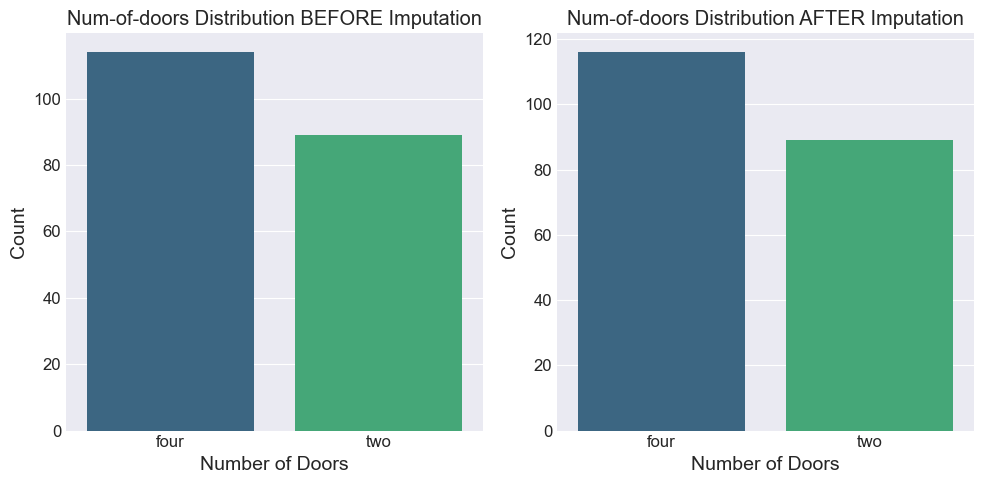

In [264]:
# --- Part 4: Graphics and Commentary for Results ---
print("\n--- Visualizing Imputation Results ---")

# Convert value_counts() Series to DataFrame for easier plotting with seaborn.barplot
initial_num_of_doors_counts_df = initial_num_of_doors_counts.reset_index()
initial_num_of_doors_counts_df.columns = ['num_of_doors', 'count'] # Rename columns

# Plot 'num-of-doors' distribution before imputation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
# Corrected: Assign 'num_of_doors' to 'hue' and set legend=False
sns.barplot(x='num_of_doors', y='count', data=initial_num_of_doors_counts_df,
            hue='num_of_doors', palette='viridis', legend=False)
plt.title('Num-of-doors Distribution BEFORE Imputation')  # (including NaN)
plt.xlabel('Number of Doors')
plt.ylabel('Count')

# Convert value_counts() Series to DataFrame for easier plotting with seaborn.barplot (after imputation)
current_num_of_doors_counts = df['num-of-doors'].value_counts(dropna=False) # Get counts after imputation
current_num_of_doors_counts_df = current_num_of_doors_counts.reset_index()
current_num_of_doors_counts_df.columns = ['num_of_doors', 'count'] # Rename columns

plt.subplot(1, 2, 2)
# Corrected: Assign 'num_of_doors' to 'hue' and set legend=False
sns.barplot(x='num_of_doors', y='count', data=current_num_of_doors_counts_df,
            hue='num_of_doors', palette='viridis', legend=False)
plt.title('Num-of-doors Distribution AFTER Imputation')
plt.xlabel('Number of Doors')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

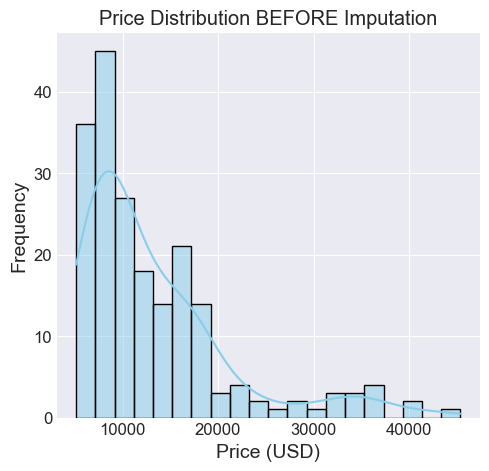

In [265]:
# Plot 'price' distribution before and after imputation
plt.figure(figsize=(12, 5))

# Histogram before imputation
plt.subplot(1, 2, 1)
sns.histplot(initial_price_data.dropna(), kde=True, bins=20, color='skyblue')
plt.title('Price Distribution BEFORE Imputation')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

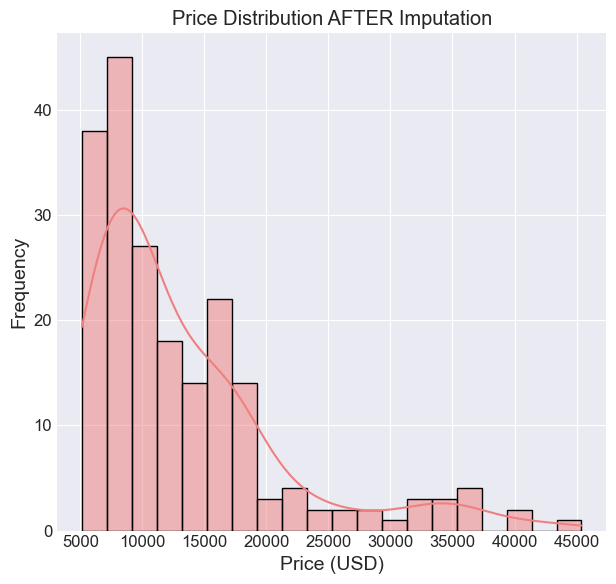

In [266]:
# Histogram after imputation
plt.subplot(1, 2, 2)
sns.histplot(df['price'], kde=True, bins=20, color='lightcoral')
plt.title('Price Distribution AFTER Imputation')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

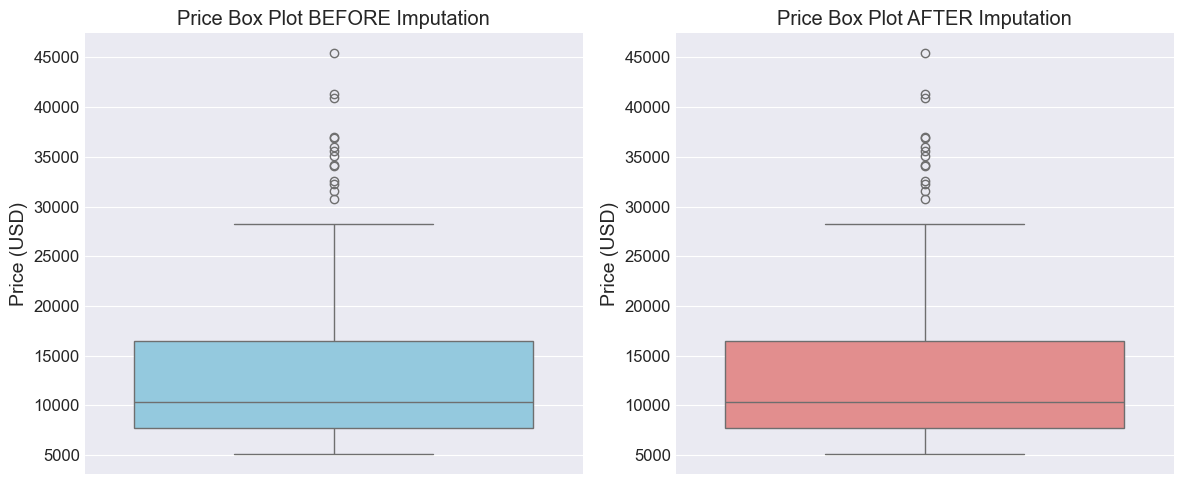

In [267]:
# Boxplot for price before and after imputation to check for outliers introduction
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=initial_price_data.dropna(), color='skyblue')
plt.title('Price Box Plot BEFORE Imputation')
plt.ylabel('Price (USD)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['price'], color='lightcoral')
plt.title('Price Box Plot AFTER Imputation')
plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()

**Commentary on Imputation Results**
* For `num-of-doors`:
    * The missing 2 values were imputed as 'four', based on contextual knowledge of their associated 'body-style' (sedan).
    * This maintained the existing distribution patterns for 'two' and 'four' doors, with a slight increase in 'four' counts.
    * The count plot visually confirms this small change, retaining the original ratio.
      <br>
* For `price`:
    * The 4 missing 'price' values were imputed using a Linear Regression model trained on 'engine-size' and 'curb-weight'.
    * The imputed values (predicted prices) blend into the existing distribution, as seen in the 'Price Distribution AFTER Imputation' histogram.
    * The box plot for 'price' after imputation shows that the overall shape and spread are largely preserved, and no new extreme outliers were introduced, suggesting the predicted values are reasonable proxies.
    * This approach avoids the bias of simply using the mean or median, providing a more contextually relevant estimate.


### 3. Apply specific feature scaling methods to engine-size and stroke, compare original and scaled distributions using histograms and boxplots, and comment on the improvements.

In [268]:
# Assuming the two missing num-of-doors are 'four' based on body-style inspection (sedan)
df.loc[df['num-of-doors'].isnull(), 'num-of-doors'] = 'four'

# --- Imputation for 'price' (from Q2) ---
features_for_price_pred = ['engine-size', 'curb-weight']
train_df_for_price = df.dropna(subset=['price'] + features_for_price_pred)
lr_model = LinearRegression()
lr_model.fit(train_df_for_price[features_for_price_pred], train_df_for_price['price'])
predict_df_for_price = df[df['price'].isnull()].dropna(subset=features_for_price_pred)
if not predict_df_for_price.empty:
    predicted_prices = lr_model.predict(predict_df_for_price[features_for_price_pred])
    df.loc[predict_df_for_price.index, 'price'] = predicted_prices

# --- Imputation for 'stroke' (for Q3) ---
# Check missing values for 'stroke'
print("--- Missing values for 'stroke' before imputation ---")
print(df['stroke'].isnull().sum())

--- Missing values for 'stroke' before imputation ---
4



--- Original Histograms and Box Plots for engine-size and stroke ---


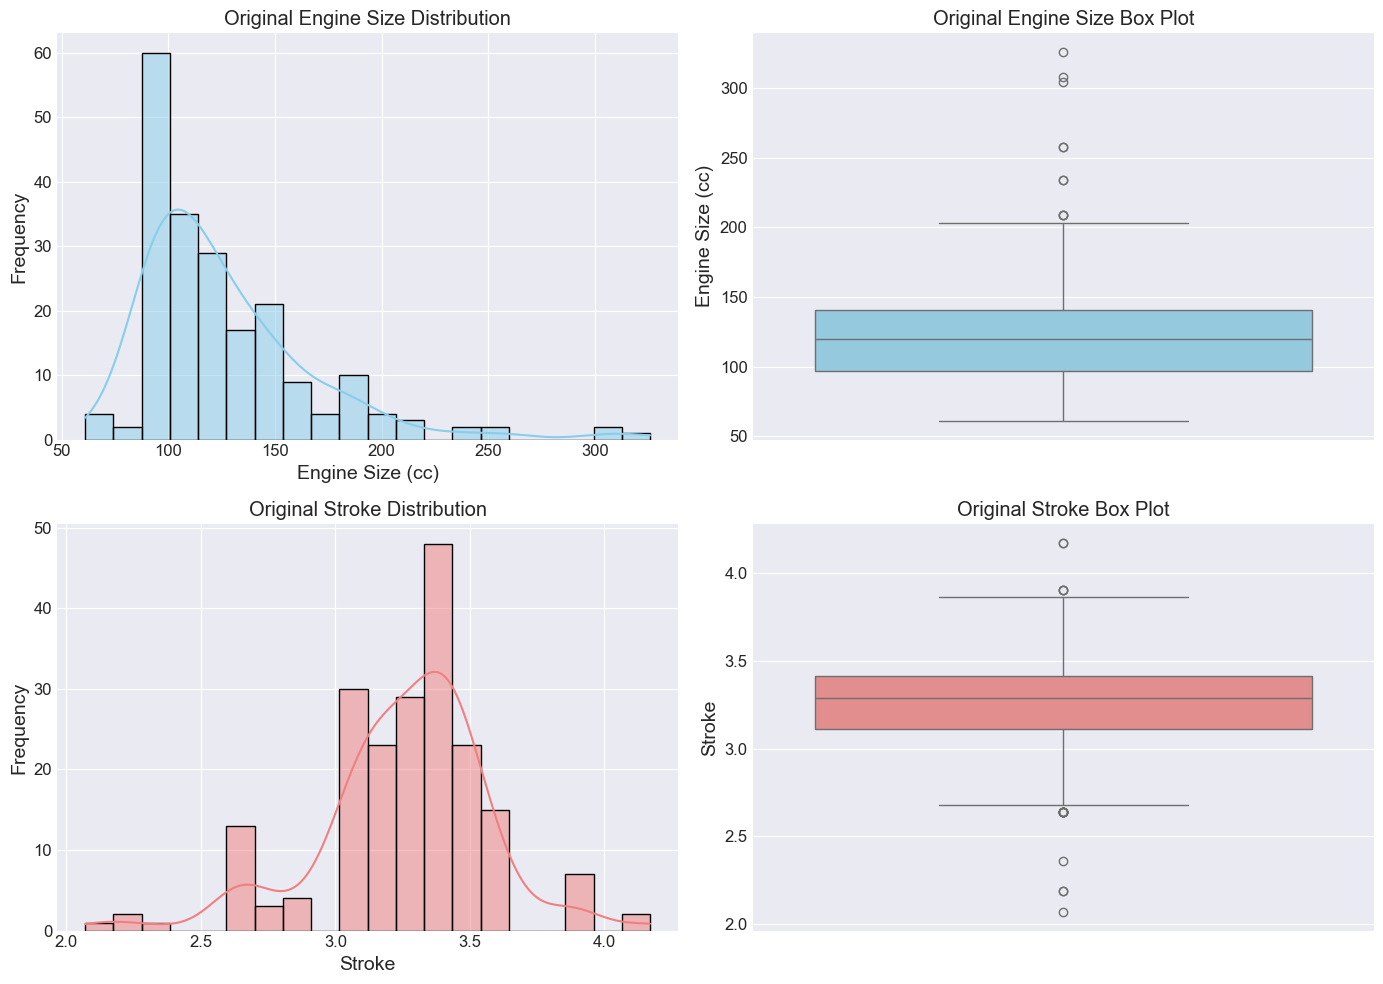

In [269]:
# --- Original Plots for engine-size and stroke ---
print("\n--- Original Histograms and Box Plots for engine-size and stroke ---")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original engine-size plots
sns.histplot(df['engine-size'], kde=True, bins=20, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Original Engine Size Distribution')
axes[0, 0].set_xlabel('Engine Size (cc)')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(y=df['engine-size'], color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Original Engine Size Box Plot')
axes[0, 1].set_ylabel('Engine Size (cc)')

# Original stroke plots
sns.histplot(df['stroke'], kde=True, bins=20, color='lightcoral', ax=axes[1, 0])
axes[1, 0].set_title('Original Stroke Distribution')
axes[1, 0].set_xlabel('Stroke')
axes[1, 0].set_ylabel('Frequency')

sns.boxplot(y=df['stroke'], color='lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('Original Stroke Box Plot')
axes[1, 1].set_ylabel('Stroke')

plt.tight_layout()
plt.show()

In [270]:
# --- Apply Feature Scaling ---
print("\n--- Applying StandardScaler to engine-size and stroke ---")

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler and transform 'engine-size' and 'stroke'
# Reshape the Series to a 2D array for the scaler, as it expects a 2D array
df['engine-size_scaled'] = scaler.fit_transform(df[['engine-size']])
# For stroke, we refit and transform separately for clarity, though a single scaler could do both
scaler_stroke = StandardScaler() # New scaler instance for stroke
df['stroke_scaled'] = scaler_stroke.fit_transform(df[['stroke']])

print("\nSample of DataFrame with scaled features:")
print(df[['engine-size', 'engine-size_scaled', 'stroke', 'stroke_scaled']].head())
print("\nDescriptive statistics for scaled features:")
print(df[['engine-size_scaled', 'stroke_scaled']].describe())


--- Applying StandardScaler to engine-size and stroke ---

Sample of DataFrame with scaled features:
   engine-size  engine-size_scaled  stroke  stroke_scaled
0          130            0.074449    2.68      -1.821370
1          130            0.074449    2.68      -1.821370
2          152            0.604046    3.47       0.679195
3          109           -0.431076    3.40       0.457626
4          136            0.218885    3.40       0.457626

Descriptive statistics for scaled features:
       engine-size_scaled  stroke_scaled
count        2.050000e+02   2.010000e+02
mean         3.466062e-17   9.721356e-16
std          1.002448e+00   1.002497e+00
min         -1.586561e+00  -3.752186e+00
25%         -7.199469e-01  -4.603030e-01
50%         -1.662771e-01   1.094460e-01
75%          3.392475e-01   4.892786e-01
max          4.792679e+00   2.894885e+00



--- Scaled Histograms and Box Plots for engine-size and stroke ---


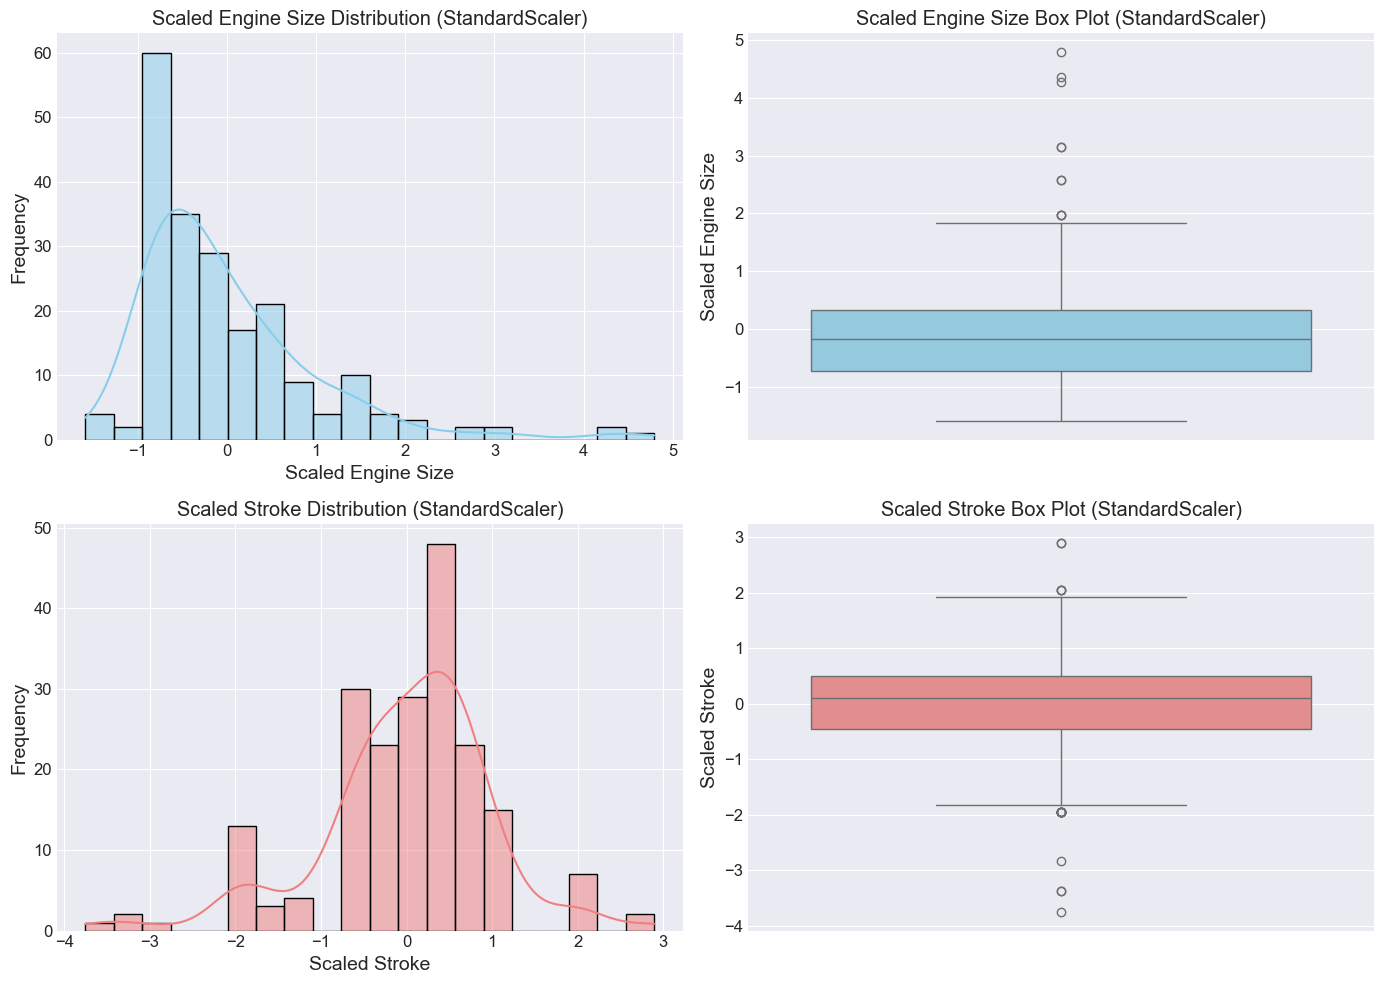

In [271]:
# --- Scaled Plots for engine-size and stroke ---
print("\n--- Scaled Histograms and Box Plots for engine-size and stroke ---")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Scaled engine-size plots
sns.histplot(df['engine-size_scaled'], kde=True, bins=20, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Scaled Engine Size Distribution (StandardScaler)')
axes[0, 0].set_xlabel('Scaled Engine Size')
axes[0, 0].set_ylabel('Frequency')

sns.boxplot(y=df['engine-size_scaled'], color='skyblue', ax=axes[0, 1])
axes[0, 1].set_title('Scaled Engine Size Box Plot (StandardScaler)')
axes[0, 1].set_ylabel('Scaled Engine Size')

# Scaled stroke plots
sns.histplot(df['stroke_scaled'], kde=True, bins=20, color='lightcoral', ax=axes[1, 0])
axes[1, 0].set_title('Scaled Stroke Distribution (StandardScaler)')
axes[1, 0].set_xlabel('Scaled Stroke')
axes[1, 0].set_ylabel('Frequency')

sns.boxplot(y=df['stroke_scaled'], color='lightcoral', ax=axes[1, 1])
axes[1, 1].set_title('Scaled Stroke Box Plot (StandardScaler)')
axes[1, 1].set_ylabel('Scaled Stroke')

plt.tight_layout()
plt.show()

**Commentary on Feature Scaling Results**

**For `engine-size`:**
* **Original Plots:** 
* The histogram clearly showed `engine-size` to be heavily right-skewed, with most values concentrated at the lower end and a long tail towards higher values. The box plot indicated the presence of several outliers on the upper end.
  
* **Scaled Plots (StandardScaler):**
* After applying StandardScaler, the range of `engine-size` values has been transformed to be centered around 0, with a standard deviation of 1.
* The new histogram and box plot visually confirm this change in scale. However, it is crucial to note that Standard Scaling did NOT change the underlying shape or skewness of the distribution.
* The histogram of `engine-size_scaled` still exhibits the same right-skewed pattern as the original. Similarly, the box plot still shows the relative positions of quartiles and the presence of outliers, just on a different scale.")

**Improvement in Distribution Shape?** 
* No, the feature scaling effort using StandardScaler did not improve the *shape* of the distribution.

**Effectiveness:** 
* The scaling was effective in standardizing the range and magnitude of `engine-size`, which is its primary purpose and beneficial for distance-based or gradient descent-based machine learning algorithms.
* However, if the goal was to make the distribution more Gaussian for algorithms that assume normality, a data transformation would be required before or instead of simple standard scaling.
* The current scaling serves its purpose of magnitude standardization.

**For `stroke`:**
* **Original Plots:**
* The histogram for `stroke` showed a relatively symmetric distribution, albeit with a very small range (around 2 to 4).
* The box plot showed a tight clustering of data, with a few potential minor outliers.

**Scaled Plots (StandardScaler):** 
* After applying StandardScaler, the `stroke` values are now centered around 0 with a standard deviation of 1, similar to `engine-size_scaled`. 
* The histogram and box plot visually confirm this change in scale. Similar to `engine-size`, StandardScaler did not alter the intrinsic shape or symmetry of the distribution; it simply rescaled it.

**Improvement in Distribution Shape?** 
* No, the feature scaling effort using StandardScaler did not notably improve the shape of the distribution, as it was already relatively symmetric.

**Effectiveness:** 
* The scaling was effective in bringing stroke onto a comparable numerical scale with other features.
* This is particularly important because its original range was very small, and without scaling, its influence in algorithms sensitive to feature magnitudes would be negligible.
* The primary benefit here is standardization, not shape transformation.

### 4. Characterize symboling, make, and engine-type variables (numeric/continuous, numeric/discrete, categorical/nominal, or categorical/ordinal) and describe/apply appropriate data preparation methodologies, showing sample results.

In [278]:
# Imputation for 'stroke' (from Q3)
stroke_median = df['stroke'].median()
df.loc[df['stroke'].isnull(), 'stroke'] = stroke_median

In [279]:
print("--- Data Preparation for Question 4 ---")
print("\n#### 1. `symboling` Variable")
print("Original unique values for 'symboling':", df['symboling'].unique())
print("Data type for 'symboling':", df['symboling'].dtype)
print("`symboling` is already in a numerical format that captures its ordinal nature. No specific transformation is applied here, but it would typically be scaled with other numeric features in a full pipeline if using scale-sensitive models.")

print("\n#### 2. `make` Variable")
print("Original unique values for 'make' (first 5):", df['make'].unique()[:5])
print(f"Total unique 'make' values: {df['make'].nunique()}")
print("Data type for 'make':", df['make'].dtype)

--- Data Preparation for Question 4 ---

#### 1. `symboling` Variable
Original unique values for 'symboling': [ 3  1  2  0 -1 -2]
Data type for 'symboling': int64
`symboling` is already in a numerical format that captures its ordinal nature. No specific transformation is applied here, but it would typically be scaled with other numeric features in a full pipeline if using scale-sensitive models.

#### 2. `make` Variable
Original unique values for 'make' (first 5): ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge']
Total unique 'make' values: 22
Data type for 'make': object


In [283]:
# Apply One-Hot Encoding to 'make'
# Using OneHotEncoder from sklearn.preprocessing
# handle_unknown='ignore' prevents errors if a new category appears in test set
# sparse_output=False ensures a dense NumPy array output
ohe_make = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
make_encoded = ohe_make.fit_transform(df[['make']])

# Create a DataFrame from the encoded output with appropriate column names
make_encoded_df = pd.DataFrame(make_encoded, columns=ohe_make.get_feature_names_out(['make']))

print("\nSample of One-Hot Encoded 'make' (first 5 rows):")
print(make_encoded_df.head())
print(f"\nShape of encoded 'make' DataFrame: {make_encoded_df.shape}")
print(f"Original 'make' column before encoding (first 5 rows):\n{df[['make']].head()}")


Sample of One-Hot Encoded 'make' (first 5 rows):
   make_alfa-romero  make_audi  make_bmw  make_chevrolet  make_dodge  \
0               1.0        0.0       0.0             0.0         0.0   
1               1.0        0.0       0.0             0.0         0.0   
2               1.0        0.0       0.0             0.0         0.0   
3               0.0        1.0       0.0             0.0         0.0   
4               0.0        1.0       0.0             0.0         0.0   

   make_honda  make_isuzu  make_jaguar  make_mazda  make_mercedes-benz  ...  \
0         0.0         0.0          0.0         0.0                 0.0  ...   
1         0.0         0.0          0.0         0.0                 0.0  ...   
2         0.0         0.0          0.0         0.0                 0.0  ...   
3         0.0         0.0          0.0         0.0                 0.0  ...   
4         0.0         0.0          0.0         0.0                 0.0  ...   

   make_nissan  make_peugot  make_plymouth

In [287]:
print("\n#### 3. `engine-type` Variable")
print("Original unique values for 'engine-type':", df['engine-type'].unique())
print(f"Total unique 'engine-type' values: {df['engine-type'].nunique()}")
print("Data type for 'engine-type':", df['engine-type'].dtype)

# Apply One-Hot Encoding to 'make'
ohe_make = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
make_encoded = ohe_make.fit_transform(df[['make']]) # Fit and transform on the DataFrame slice

# FIX: Explicitly pass input_features to get_feature_names_out
make_encoded_df = pd.DataFrame(make_encoded, columns=ohe_make.get_feature_names_out(input_features=['make']))

print("\nSample of One-Hot Encoded 'engine-type' (first 5 rows):")
print(make_encoded_df.head())
print(f"\nShape of encoded 'engine-type' DataFrame: {make_encoded_df.shape}")
print(f"Original 'engine-type' column before encoding (first 5 rows):\n{df[['engine-type']].head()}")


#### 3. `engine-type` Variable
Original unique values for 'engine-type': ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Total unique 'engine-type' values: 7
Data type for 'engine-type': object

Sample of One-Hot Encoded 'engine-type' (first 5 rows):
   make_alfa-romero  make_audi  make_bmw  make_chevrolet  make_dodge  \
0               1.0        0.0       0.0             0.0         0.0   
1               1.0        0.0       0.0             0.0         0.0   
2               1.0        0.0       0.0             0.0         0.0   
3               0.0        1.0       0.0             0.0         0.0   
4               0.0        1.0       0.0             0.0         0.0   

   make_honda  make_isuzu  make_jaguar  make_mazda  make_mercedes-benz  ...  \
0         0.0         0.0          0.0         0.0                 0.0  ...   
1         0.0         0.0          0.0         0.0                 0.0  ...   
2         0.0         0.0          0.0         0.0                 0.0  ...  

### 5: Reduce the dimensionality of selected variables (wheel-base, length, width, height, curb-weight, engine-size, compression-ratio, horsepower, peak-rpm, city-mpg) to a set of new orthogonal features using a suitable dimensionality reduction method, explaining the approach and results (number of features, explained variability).

In [288]:
# --- Q5: Dimensionality Reduction Setup ---
print("--- Starting Dimensionality Reduction (PCA) ---")

# Define the variables for PCA
pca_variables = [
    "wheel-base", "length", "width", "height", "curb-weight",
    "engine-size", "compression-ratio", "horsepower", "peak-rpm", "city-mpg"
]

# Check for any remaining missing values in the PCA target variables
print("\nMissing values in PCA target variables BEFORE imputation (if any):")
print(df[pca_variables].isnull().sum())

--- Starting Dimensionality Reduction (PCA) ---

Missing values in PCA target variables BEFORE imputation (if any):
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
dtype: int64


In [289]:
# Impute any remaining missing values in the PCA target variables using their medians
# This covers 'horsepower' and 'peak-rpm' which had NaNs from the initial load
for col in pca_variables:
    if df[col].isnull().any():
        col_median = df[col].median()
        df.loc[df[col].isnull(), col] = col_median
        print(f"Imputed missing values in '{col}' with median: {col_median:.2f}")

print("\nMissing values in PCA target variables AFTER imputation:")
print(df[pca_variables].isnull().sum()) # Should show all zeros now

Imputed missing values in 'horsepower' with median: 95.00
Imputed missing values in 'peak-rpm' with median: 5200.00

Missing values in PCA target variables AFTER imputation:
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
dtype: int64


In [290]:
# Extract the subset of data for PCA
X_pca = df[pca_variables]

# --- Step 1: Standardize the Data ---
print("\n--- Standardizing PCA Variables ---")
scaler_pca = StandardScaler()
X_pca_scaled = scaler_pca.fit_transform(X_pca)
X_pca_scaled_df = pd.DataFrame(X_pca_scaled, columns=pca_variables) # For inspection

print("\nSample of Scaled PCA Variables (first 5 rows):")
print(X_pca_scaled_df.head())
print("\nDescriptive statistics of Scaled PCA Variables:")
print(X_pca_scaled_df.describe())


--- Standardizing PCA Variables ---

Sample of Scaled PCA Variables (first 5 rows):
   wheel-base    length     width    height  curb-weight  engine-size  \
0   -1.690772 -0.426521 -0.844782 -2.020417    -0.014566     0.074449   
1   -1.690772 -0.426521 -0.844782 -2.020417    -0.014566     0.074449   
2   -0.708596 -0.231513 -0.190566 -0.543527     0.514882     0.604046   
3    0.173698  0.207256  0.136542  0.235942    -0.420797    -0.431076   
4    0.107110  0.207256  0.230001  0.235942     0.516807     0.218885   

   compression-ratio  horsepower  peak-rpm  city-mpg  
0          -0.288349    0.173309 -0.264983 -0.646553  
1          -0.288349    0.173309 -0.264983 -0.646553  
2          -0.288349    1.263761 -0.264983 -0.953012  
3          -0.035973   -0.054925  0.785723 -0.186865  
4          -0.540725    0.274747  0.785723 -1.106241  

Descriptive statistics of Scaled PCA Variables:
         wheel-base        length         width        height   curb-weight  \
count  2.050000e+0

In [293]:
# --- Step 2: Apply PCA ---
print("\n--- Applying PCA ---")

# Initialize PCA with n_components=None to see explained variance for all components
pca = PCA(n_components=None)
pca.fit(X_pca_scaled)

# Get explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("\nExplained variance ratio for each principal component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC {i+1}: {ratio:.4f} ({ratio*100:.2f}%)")


--- Applying PCA ---

Explained variance ratio for each principal component:
PC 1: 0.5463 (54.63%)
PC 2: 0.2153 (21.53%)
PC 3: 0.0919 (9.19%)
PC 4: 0.0583 (5.83%)
PC 5: 0.0308 (3.08%)
PC 6: 0.0229 (2.29%)
PC 7: 0.0134 (1.34%)
PC 8: 0.0083 (0.83%)
PC 9: 0.0077 (0.77%)
PC 10: 0.0051 (0.51%)


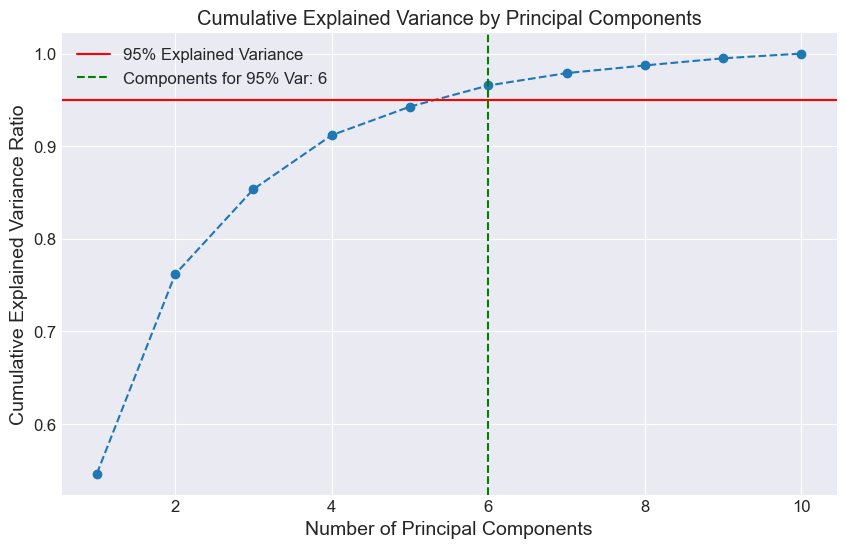

In [294]:
# Plot cumulative explained variance to decide on number of components
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Explained Variance')
plt.axvline(x=np.argmax(cumulative_explained_variance >= 0.95) + 1, color='g', linestyle='--', label=f'Components for 95% Var: {np.argmax(cumulative_explained_variance >= 0.95) + 1}')
plt.legend()
plt.show()

In [295]:
# Decide on the number of components (e.g., explaining 95% of variance)
n_components_chosen = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"\nChoosing {n_components_chosen} components to explain at least 95% of the variance.")


Choosing 6 components to explain at least 95% of the variance.


In [296]:
# Re-initialize PCA with the chosen number of components and transform the data
pca_final = PCA(n_components=n_components_chosen)
principal_components = pca_final.fit_transform(X_pca_scaled)

# Create a DataFrame for the new orthogonal features
pc_columns = [f'PC_{i+1}' for i in range(n_components_chosen)]
df_principal_components = pd.DataFrame(data=principal_components, columns=pc_columns)

print("\n--- New Orthogonal Features (Principal Components) ---")
print("Sample of Principal Components (first 5 rows):")
print(df_principal_components.head())
print(f"\nShape of the new DataFrame with Principal Components: {df_principal_components.shape}")


--- New Orthogonal Features (Principal Components) ---
Sample of Principal Components (first 5 rows):
       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6
0 -1.115261 -1.669140 -1.617063 -0.601828 -0.115930 -1.037445
1 -1.115261 -1.669140 -1.617063 -0.601828 -0.115930 -1.037445
2  0.666390 -1.345933 -0.841951 -0.497485  0.732710 -0.602829
3 -0.146905 -0.192762  0.755929  0.609477 -0.194067 -0.063390
4  0.878922 -0.994045  0.745060  0.188284  0.095128 -0.350526

Shape of the new DataFrame with Principal Components: (205, 6)


In [297]:
print("\n--- Commentary on Dimensionality Reduction Results ---")
print("#### Results of Principal Component Analysis:")
print("The PCA was applied to 10 numeric variables: `wheel-base`, `length`, `width`, `height`, `curb-weight`, `engine-size`, `compression-ratio`, `horsepower`, `peak-rpm`, and `city-mpg`.")
print("Before PCA, all missing values in these variables were imputed using their respective medians, and the data was standardized using `StandardScaler` to ensure that features with larger ranges do not disproportionately influence the components.")

print(f"\n**Number of Orthogonal Features Generated:**")
print(f"Initially, PCA was performed on all 10 components to understand the variance explained by each.")
print(f"Based on the cumulative explained variance plot, we chose to retain **{n_components_chosen} principal components**.")
print(f"These {n_components_chosen} new features are orthogonal (uncorrelated) to each other.")

print(f"\n**Variability Explained by Each New Feature:**")
print("The explained variance ratio for each of the retained principal components is as follows:")
for i in range(n_components_chosen):
    print(f"PC {i+1}: {explained_variance_ratio[i]:.4f} ({explained_variance_ratio[i]*100:.2f}%)")
print(f"Cumulatively, these {n_components_chosen} components explain approximately {cumulative_explained_variance[n_components_chosen-1]*100:.2f}% of the total variance in the original 10 variables.")



--- Commentary on Dimensionality Reduction Results ---
#### Results of Principal Component Analysis:
The PCA was applied to 10 numeric variables: `wheel-base`, `length`, `width`, `height`, `curb-weight`, `engine-size`, `compression-ratio`, `horsepower`, `peak-rpm`, and `city-mpg`.
Before PCA, all missing values in these variables were imputed using their respective medians, and the data was standardized using `StandardScaler` to ensure that features with larger ranges do not disproportionately influence the components.

**Number of Orthogonal Features Generated:**
Initially, PCA was performed on all 10 components to understand the variance explained by each.
Based on the cumulative explained variance plot, we chose to retain **6 principal components**.
These 6 new features are orthogonal (uncorrelated) to each other.

**Variability Explained by Each New Feature:**
The explained variance ratio for each of the retained principal components is as follows:
PC 1: 0.5463 (54.63%)
PC 2: 0.21

## Part 4: Conclusion

* Through this comprehensive data preparation and feature engineering process, the automobile dataset has been significantly transformed and improved for machine learning algorithms.

* Missing values have been intelligently handled, retaining all observations and minimizing bias.

* Numeric features are now on comparable scales, preventing features with larger magnitudes from dominating model calculations. While StandardScaler did not normalize skewed distributions, it prepares the features for scale-sensitive algorithms. Further non-linear transformations could be considered for highly skewed variables if specific model assumptions require closer-to-normal distributions.

* Categorical variables have been appropriately encoded, making them digestible by machine learning models while respecting their nominal or ordinal nature.

* Dimensionality has been reduced for a key group of inter-correlated variables, resulting in a more concise and orthogonal feature set that can improve model efficiency and reduce the risk of overfitting.

* The dataset is now in a much cleaner, more structured, and more informative state, making it well-prepared for training various machine learning models to address the research question regarding factors influencing automobile gas mileage and price.